In [ ]:
!pip install tensorflow
!pip install opencv-python
!pip install matplotlib
!pip list

In [2]:
import tensorflow as tf
import os

In [3]:
gpus = tf.config.experimental.list_physical_devices('CPU')

In [4]:
gpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [5]:
#limiting GPU memory
gpus = tf.config.experimental.list_physical_devices('CPU')
for gpu in gpus:
    try:
        tf.config.experimental.set_memory_growth(gpu,True)
    except ZeroDivisionError as e:
        print("Error: ", e)
print("hello world")


ValueError: Cannot set memory growth on non-GPU and non-Pluggable devices

In [ ]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [ ]:
data_dir = "data"
os.listdir(os.path.join(data_dir,'dogs'))
img_exts = ['png','jpg','bmp','jpeg']

for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir,image_class,image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in img_exts:
                print('image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Expection as e : 
            print('Issue with image {}'.format(image_path))


In [149]:
!pip install tensorflow opencv-python matplotlib
!pip list


Defaulting to user installation because normal site-packages is not writeable


Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
alabaster                     0.7.12
anaconda-client               1.11.0
anaconda-navigator            2.3.1
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.11.7
astropy                       5.1
astunparse                    1.6.3
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1
binaryornot                   0.4.4
bi

Found 612 files belonging to 2 classes.


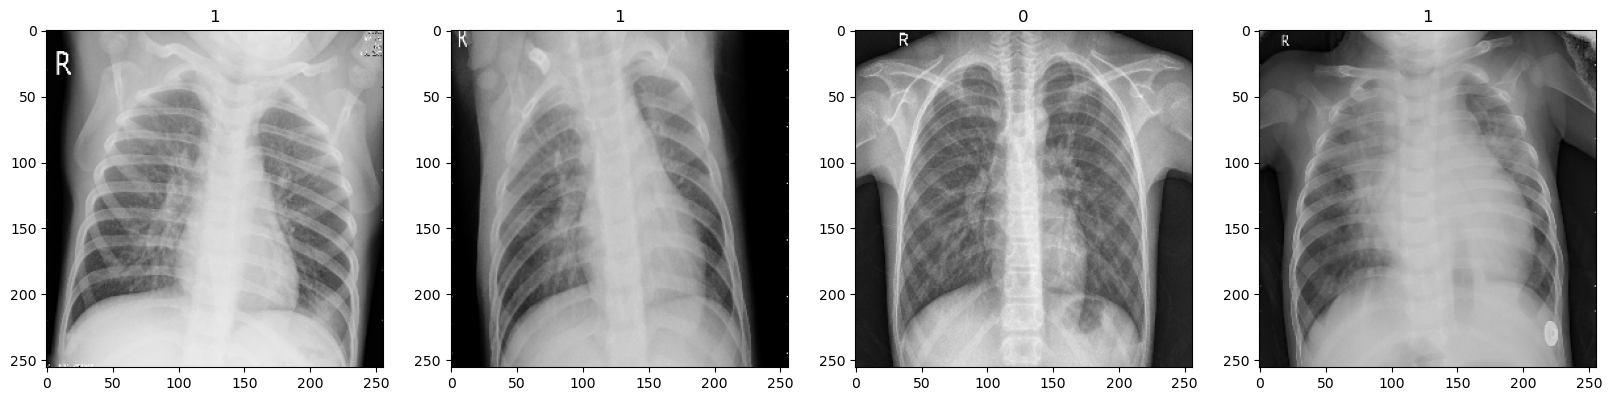

In [29]:
import numpy as np
from matplotlib import pyplot as plt

data = tf.keras.utils.image_dataset_from_directory('test')
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])




In [19]:
data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()

(array([[[[0.08468137, 0.08468137, 0.08468137],
          [0.08321078, 0.08321078, 0.08321078],
          [0.08584559, 0.08584559, 0.08584559],
          ...,
          [0.6262619 , 0.6262619 , 0.6262619 ],
          [0.21132238, 0.21132238, 0.21132238],
          [0.5455212 , 0.5455212 , 0.5455212 ]],
 
         [[0.0807598 , 0.0807598 , 0.0807598 ],
          [0.07928921, 0.07928921, 0.07928921],
          [0.08976716, 0.08976716, 0.08976716],
          ...,
          [0.46052772, 0.46052772, 0.46052772],
          [0.5828393 , 0.5828393 , 0.5828393 ],
          [0.5674575 , 0.5674575 , 0.5674575 ]],
 
         [[0.07760991, 0.07760991, 0.07760991],
          [0.07685164, 0.07685164, 0.07685164],
          [0.07843138, 0.07843138, 0.07843138],
          ...,
          [0.46781558, 0.46781558, 0.46781558],
          [0.5685604 , 0.5685604 , 0.5685604 ],
          [0.5797392 , 0.5797392 , 0.5797392 ]],
 
         ...,
 
         [[0.        , 0.        , 0.        ],
          [0.     

In [20]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)
taille = train_size + val_size + test_size
if (len(data)==taille ):
    print(True)

True


In [21]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [32]:
model = Sequential()

In [33]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [34]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 16)      

In [36]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=12, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/12
14/14 [==============================] - 11s 660ms/step - loss: 0.6681 - accuracy: 0.6987 - val_loss: 0.4345 - val_accuracy: 0.8828
Epoch 2/12
14/14 [==============================] - 10s 630ms/step - loss: 0.3742 - accuracy: 0.8393 - val_loss: 0.2720 - val_accuracy: 0.8672
Epoch 3/12
14/14 [==============================] - 10s 635ms/step - loss: 0.2321 - accuracy: 0.9062 - val_loss: 0.1943 - val_accuracy: 0.9297
Epoch 4/12
14/14 [==============================] - 10s 629ms/step - loss: 0.1754 - accuracy: 0.9397 - val_loss: 0.1814 - val_accuracy: 0.9375
Epoch 5/12
14/14 [==============================] - 10s 661ms/step - loss: 0.1537 - accuracy: 0.9353 - val_loss: 0.1537 - val_accuracy: 0.9531
Epoch 6/12
14/14 [==============================] - 10s 661ms/step - loss: 0.1276 - accuracy: 0.9531 - val_loss: 0.0720 - val_accuracy: 0.9766
Epoch 7/12
14/14 [==============================] - 10s 641ms/step - loss: 0.1202 - accuracy: 0.9621 - val_loss: 0.2044 - val_accuracy: 0.9062

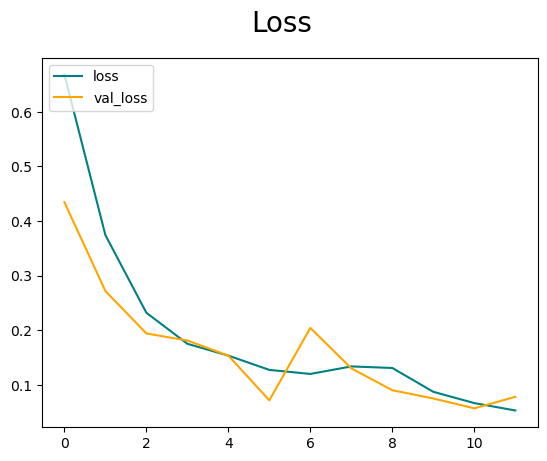

In [37]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

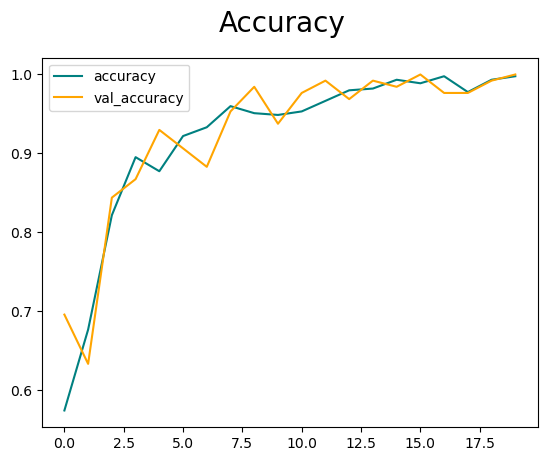

In [189]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [190]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [216]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
print(pre.result(), re.result(), acc.result())

1/1 [==============================] - 0s 53ms/step
tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


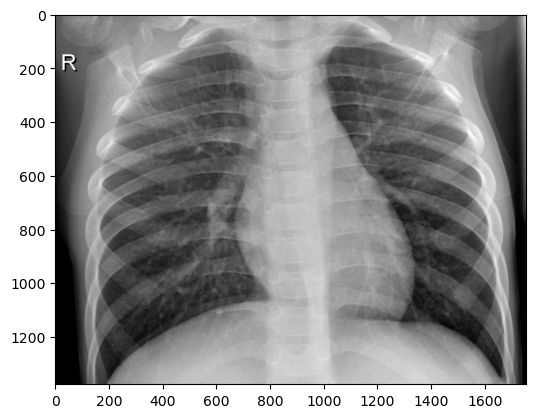

In [43]:
import cv2
img = cv2.imread('NORMAL2-IM-0277-0001.jpeg')
plt.imshow(img)
plt.show()

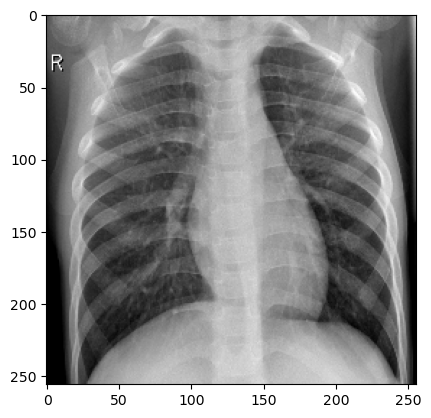

In [44]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [45]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 77ms/step


array([[0.00069455]], dtype=float32)

In [46]:
if yhat > 0.5: 
    print(f'Predicted class : PNEUMONIA')
else:
    print(f'Predicted class : NORMAL')

Predicted class : Normal


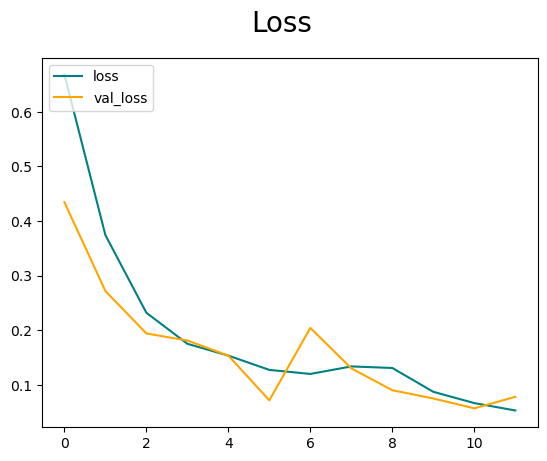

In [47]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [48]:
!pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2968 sha256=ada663ef06b1cd8c07e448bfefdfb061beba881cecdfc1d20cf376cdf1689aaa
  Stored in directory: c:\users\lahce\appdata\local\pip\cache\wheels\36\49\c9\2374f1dee1b599effabf63d948635e6608f62d0ccde027b7e2
Successfully built sklearn



[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


In [ ]:
y_true = []
y_pred = []

for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    yhat = np.round(yhat).flatten()  # Arrondir les prédictions à 0 ou 1
    y_true.extend(y)
    y_pred.extend(yhat)

y_true = np.array(y_true)
y_pred = np.array(y_pred)

class_names = ["Normal", "Pneumonie"]

# Calculer la matrice de confusion
cm = confusion_matrix(y_true, y_pred)

# Créer le heatmap avec les noms de classe
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.show()